In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 0)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 3)
np.set_printoptions(linewidth=1000)

In [5]:
enformer_df = pd.read_csv('../pretrained_models/Enformer/Enformer_info.csv')
enformer_df

,identifier,assay,cell_type,target
0,ENCFF833POA,DNase,cerebellum male adult (27 years) and male adul...,DNase/cerebellum male adult (27 years) and mal...
1,ENCFF110QGM,DNase,frontal cortex male adult (27 years) and male ...,DNase/frontal cortex male adult (27 years) and...
2,ENCFF880MKD,DNase,chorion,DNase/chorion
3,ENCFF463ZLQ,DNase,Ishikawa treated with 0.02% dimethyl sulfoxide...,DNase/Ishikawa treated with 0.02% dimethyl sul...
4,ENCFF890OGQ,DNase,GM03348,DNase/GM03348
5,ENCFF996AEF,DNase,GM03348 genetically modified using transductio...,DNase/GM03348 genetically modified using trans...
6,ENCFF660YSU,DNase,AG08395,DNase/AG08395
7,ENCFF787MSC,DNase,AG08396,DNase/AG08396
8,ENCFF568LMQ,DNase,AG20443,DNase/AG20443
...,...,...,...,...


In [6]:
counter = Counter(enformer_df['assay'])
for a in counter.most_common(15):
    print(a)

('DNase', 674)
('CAGE', 638)
('ChIP-Histone:H3K4me3', 338)
('ChIP-Histone:H3K36me3', 269)
('ChIP-Histone:H3K27me3', 260)
('ChIP-Histone:H3K4me1', 259)
('ChIP-Histone:H3K9me3', 252)
('ChIP-Histone:H3K27ac', 228)
('ChIP-TF:CTCF', 205)
('ChIP-TF:.', 120)
('ChIP-Histone:H3K9ac', 98)
('ChIP-TF:POLR2A', 85)
('ChIP-TF:EP300', 54)
('ChIP-TF:H2AFZ', 45)
('ChIP-TF:POLR2AphosphoS5', 45)


In [7]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']
index_list = []
index_df = pd.DataFrame(index=cell_types, columns=assays)

for cell_type in cell_types:
    for assay in assays:
        # mask = (enformer_df['cell_type'].str.contains(cell_type)) & (enformer_df['assay'].str.contains(assay))
        mask = (enformer_df['cell_type'] == cell_type) & (enformer_df['assay'].str.contains(assay))
        index = enformer_df[mask].index.tolist()
        # print(enformer_df.iloc[index])
        index_df.loc[cell_type, assay] = index
        index_list.extend(index)

In [8]:
index_df

,DNase,H3K4me1,H3K4me3,H3K9me3,H3K27me3,H3K27ac,H3K36me3,CTCF
HepG2,"[27, 91, 234]",[772],"[717, 1182, 3227]",[830],"[749, 1181]",[],[1180],[904]
K562,"[121, 122, 123, 625]",[1389],"[701, 1210, 1387, 3507]",[762],"[698, 1388]",[],"[699, 1209]","[697, 1012, 1211, 1347]"
SK-N-SH,[],"[1440, 3484]","[1441, 4439]","[1442, 3466]",[4279],"[1443, 3194]",[4450],"[1371, 3110]"
A549,[47],[],[1102],[],[],[],[],"[1084, 1242]"
HCT116,[88],"[1378, 1956]","[1173, 2467]",[2015],[3958],"[1379, 3485]",[1733],"[1055, 1172, 2203]"


In [9]:
index_df_len = index_df.map(len)
index_df_len

,DNase,H3K4me1,H3K4me3,H3K9me3,H3K27me3,H3K27ac,H3K36me3,CTCF
HepG2,3,1,3,1,2,0,1,1
K562,4,1,4,1,2,0,2,4
SK-N-SH,0,2,2,2,1,2,1,2
A549,1,0,1,0,0,0,0,2
HCT116,1,2,2,1,1,2,1,3


In [10]:
enformer_df.iloc[index_list]

,identifier,assay,cell_type,target
27,ENCFF136DBS,DNase,HepG2,DNase/HepG2
91,ENCFF205TKQ,DNase,HepG2,DNase/HepG2
234,ENCFF577SOF,DNase,HepG2,DNase/HepG2
772,ENCFF058GCZ,ChIP-Histone:H3K4me1,HepG2,ChIP-Histone:H3K4me1/HepG2
717,ENCFF746CXV,ChIP-Histone:H3K4me3,HepG2,ChIP-Histone:H3K4me3/HepG2
1182,ENCFF777EVS,ChIP-Histone:H3K4me3,HepG2,ChIP-Histone:H3K4me3/HepG2
3227,ENCFF736LHE,ChIP-Histone:H3K4me3,HepG2,ChIP-Histone:H3K4me3/HepG2
830,ENCFF485BCI,ChIP-Histone:H3K9me3,HepG2,ChIP-Histone:H3K9me3/HepG2
749,ENCFF598TWA,ChIP-Histone:H3K27me3,HepG2,ChIP-Histone:H3K27me3/HepG2
...,...,...,...,...


In [16]:
predicted_df = np.load('outputs/SirajMPRA_Enformer_no_padding.npy').mean(1)
# predicted_df = np.load('outputs/SirajMPRA_Enformer_zero_padding.npy')
print(predicted_df.shape)

(562654, 5313)


In [12]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

predicted_features_array = np.zeros((len(cell_types), len(assays), len(predicted_df)))
print(predicted_features_array.shape)

(5, 8, 562654)


In [14]:
MPRA_df = pd.read_csv('../data/SirajMPRA/SirajMPRA_562654.csv')
print(MPRA_df.shape)

(562654, 12)


In [17]:
# only select the first channel

pearson_array = np.zeros((len(cell_types), len(assays)))
for c, cell_type in enumerate(cell_types):
    for a, assay in enumerate(assays):
        mask = (enformer_df['cell_type'] == cell_type) & (enformer_df['assay'].str.contains(assay))
        indice = enformer_df[mask].index.tolist()
        if indice:
            i = indice[0]
            predicted_feature = predicted_df[:, i]
            true_label = MPRA_df[cell_type]
            r = pearson(predicted_feature, true_label)
            # print(cell_type, assay, i)
            # print(r)
            predicted_features_array[c, a] = predicted_feature
            pearson_array[c, a] = r

print(pearson_array)
print(predicted_features_array.mean(-1))

[[ 0.2572881   0.320814    0.32196981 -0.03460647  0.0906474   0.          0.14317085  0.14119256]
 [ 0.39771591  0.3888455   0.43052558  0.09011138 -0.00200527  0.          0.00723427  0.18603165]
 [ 0.          0.21937805  0.33334623  0.10155407  0.07126391  0.2710194  -0.01015392  0.11112621]
 [ 0.32596252  0.          0.28683027  0.          0.          0.          0.          0.18611062]
 [ 0.3453855   0.40222115  0.38762329 -0.09989336 -0.1258484   0.41301015  0.046496    0.07128039]]
[[0.12610093 1.07799648 0.54610791 1.55065254 1.54655097 0.         1.01884604 1.14525606]
 [0.05567996 1.21945915 0.87952764 1.30160894 1.52207745 0.         1.03425889 1.08423032]
 [0.         1.55097729 0.44496851 1.35633778 1.72687048 1.29821829 1.4607702  1.09726583]
 [0.08011327 0.         0.40001141 0.         0.         0.         0.         0.85743888]
 [0.09992006 1.64520741 0.79024107 1.54365943 1.65094929 1.8438534  1.52801779 0.99224526]]


In [18]:
# average every channel

pearson_array = np.zeros((len(cell_types), len(assays)))
for c, cell_type in enumerate(cell_types):
    for a, assay in enumerate(assays):
        mask = (enformer_df['cell_type'] == cell_type) & (enformer_df['assay'].str.contains(assay))
        indice = enformer_df[mask].index.tolist()
        if indice:
            predicted_feature = predicted_df[:, indice].mean(1)
            true_label = MPRA_df[cell_type]
            r = pearson(predicted_feature, true_label)
            # print(cell_type, assay)
            # print(r)
            predicted_features_array[c, a] = predicted_feature
            pearson_array[c, a] = r

print(pearson_array)
print(predicted_features_array.mean(-1))

[[ 0.31398445  0.320814    0.26572497 -0.03460647  0.09715512  0.          0.14317085  0.14119256]
 [ 0.40444665  0.3888455   0.37385256  0.09011138  0.03565461  0.          0.0647388   0.21023409]
 [ 0.          0.27440386  0.32478043  0.03713496  0.07126391  0.30542933 -0.01015392  0.1200836 ]
 [ 0.32596252  0.          0.28683027  0.          0.          0.          0.          0.16486937]
 [ 0.3453855   0.42617004  0.39781031 -0.09989336 -0.1258484   0.41502785  0.046496    0.14910711]]
[[0.08943067 1.07799648 0.65405198 1.55065254 1.46764794 0.         1.01884604 1.14525606]
 [0.06448267 1.21945915 0.77083787 1.30160894 1.73575782 0.         1.11237971 1.14601371]
 [0.         1.53915282 0.93783725 1.4275906  1.72687048 1.23888073 1.4607702  1.11346944]
 [0.08011327 0.         0.40001141 0.         0.         0.         0.         1.02645048]
 [0.09992006 1.72771569 0.99334298 1.54365943 1.65094929 1.98321524 1.52801779 1.20620603]]


In [20]:
pearson_df = pd.DataFrame(pearson_array, index=cell_types, columns=assays)
pearson_df

,DNase,H3K4me1,H3K4me3,H3K9me3,H3K27me3,H3K27ac,H3K36me3,CTCF
HepG2,0.314,0.321,0.266,-0.035,0.097,0.000,0.143,0.141
K562,0.404,0.389,0.374,0.090,0.036,0.000,0.065,0.210
SK-N-SH,0.000,0.274,0.325,0.037,0.071,0.305,-0.010,0.120
A549,0.326,0.000,0.287,0.000,0.000,0.000,0.000,0.165
HCT116,0.345,0.426,0.398,-0.100,-0.126,0.415,0.046,0.149


/tmp/ipykernel_93114/3291978931.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


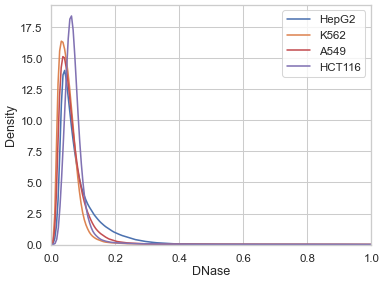

/tmp/ipykernel_93114/3291978931.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


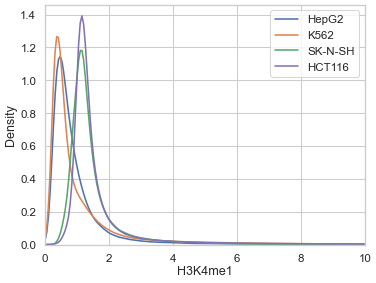

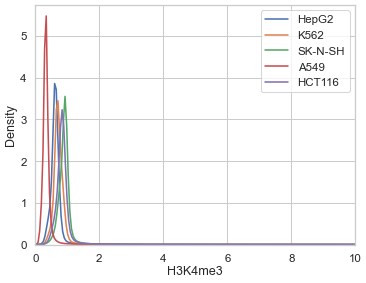

/tmp/ipykernel_93114/3291978931.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


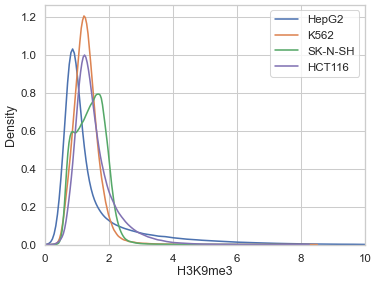

/tmp/ipykernel_93114/3291978931.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


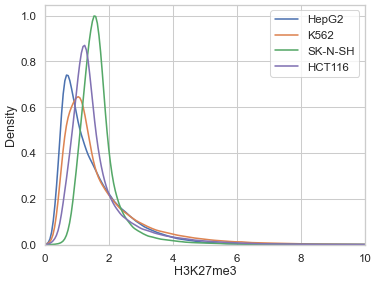

/tmp/ipykernel_93114/3291978931.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)
/tmp/ipykernel_93114/3291978931.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)
/tmp/ipykernel_93114/3291978931.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


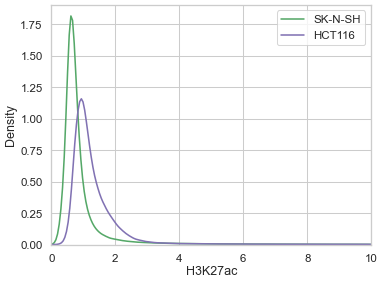

/tmp/ipykernel_93114/3291978931.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


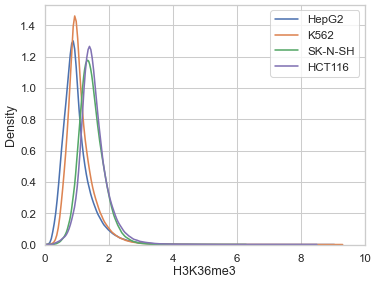

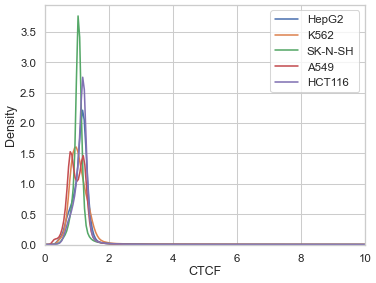

In [19]:
for j, assay in enumerate(assays):
    if assay == 'DNase':
        max_value = 1
    else:
        max_value = 10
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for i, cell_type in enumerate(cell_types):
        x = predicted_features_array[i, j]
        x = x[x<max_value]
        sns.kdeplot(x, label=cell_type)
    plt.xlabel(f'{assay}')
    plt.xlim(0, max_value)
    plt.legend()
    plt.savefig(f'figures/{assay}.png', dpi=200)
    plt.show()